# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [447]:
# 1. Import pandas as pd and numpy as np
import pandas as pd
import numpy as np

In [448]:
# 2. Print the version of pandas that has been imported.
print(pd.__version__)

2.3.3


In [449]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
pd.Series(data)


0    10
1    20
2    30
3    40
4    50
dtype: int64

In [450]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
df=pd.DataFrame(data_dict)

In [451]:
# 5. Set the 'name' column as the index of the DataFrame created in Q4.
df.set_index('name',inplace=True)
df

,age,city
name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [452]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo=pd.read_csv(url,sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [453]:
# 7. Show the first 10 entries of the dataframe.
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [454]:
# 8. What is the number of observations (rows) and columns in the dataset?
chipo.shape

(4622, 5)

In [455]:
# 9. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [456]:
# 10. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [457]:
# 11. Check the data type of each column.
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [458]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [459]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [460]:
# 14. Drop any duplicate rows, if they exist.
chipo.drop_duplicates(inplace=True)


In [461]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo["revenue"]=chipo["quantity"]*chipo["item_price"]
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


---
## Section 4: Filtering & Sorting


In [462]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo.sort_values(by='item_price',ascending=False)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
...,...,...,...,...,...,...
2584,1025,1,Canned Soda,[Mountain Dew],1.09,1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09,1.09
87,38,1,Bottled Water,NaN,1.09,1.09
3499,1405,1,Bottled Water,NaN,1.09,1.09


In [463]:
# 17. How many items cost more than $10.00?
chipo[chipo["item_price"]>10.00].shape[0]

1123

In [464]:
# 18. What is the price of each item? 
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
chipo[['item_name','item_price']].drop_duplicates()


,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4237,Chips and Guacamole,8.50
4354,Steak Soft Tacos,18.50
4489,Chips and Guacamole,17.80
4509,Chips,1.99


In [465]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chipo[chipo["item_name"]=="Chicken Bowl"]

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49
...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,8.75


In [466]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chipo[(chipo["item_name"]=="Chicken Bowl") & (chipo["quantity"]>1)]

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50,35.00
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50,35.00
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50,35.00
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [491]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks=pd.read_csv(url_drinks,sep=',')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [496]:
# 22. Which continent drinks more beer on average?
drinks.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

In [497]:
# 23. For each continent, print the statistics for wine consumption.
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [499]:
# 24. Print the mean alcohol consumption per continent for every column.
drinks.groupby('continent')["total_litres_of_pure_alcohol"].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [500]:
# 25. Print the median alcohol consumption per continent for every column.
drinks.groupby('continent')["total_litres_of_pure_alcohol"].median()

continent
AF     2.30
AS     1.20
EU    10.00
OC     1.75
SA     6.85
Name: total_litres_of_pure_alcohol, dtype: float64

---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [501]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def indicator(price):
    if price>10:
        return "High"
    else:
        return "Low"
chipo['price_level']=chipo['item_price'].apply(indicator)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,Low
1,1,1,Izze,[Clementine],3.39,3.39,Low
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,Low
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,Low
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,High


In [502]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name']=chipo['item_name'].apply(lambda x: x.capitalize())
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
0,1,1,Chips and fresh tomato salsa,NaN,2.39,2.39,Low
1,1,1,Izze,[Clementine],3.39,3.39,Low
2,1,1,Nantucket nectar,[Apple],3.39,3.39,Low
3,1,1,Chips and tomatillo-green chili salsa,NaN,2.39,2.39,Low
4,2,2,Chicken bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,High


In [504]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
chipo.iloc[10:21,1:4]

,quantity,item_name,choice_description
10,1,Chips and guacamole,NaN
11,1,Chicken crispy tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,..."
12,1,Chicken soft tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,..."
13,1,Chicken bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,..."
14,1,Chips and guacamole,NaN
15,1,Chips and tomatillo-green chili salsa,NaN
16,1,Chicken burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ..."
17,1,Chicken burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice..."
18,2,Canned soda,[Sprite]
19,1,Chicken bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables..."


---
## Section 7: Merging & Joining


In [507]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
pd.merge(df1,df2,on='ID',how='inner')

,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [508]:
# 30. Merge them on 'ID' using an outer join.
pd.merge(df1,df2,on='ID',how='outer')

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [509]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
pd.merge(df1,df2,on='ID',how='left')

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [511]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
Date=pd.date_range(start='2023-01-01',end='2023-01-10')

In [519]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
df=pd.DataFrame({'Sales': np.random.randint(100, size=10)}, index=Date)

In [522]:
# 34. Resample the data to calculate the 3-day sum of sales.
df['Sales'].resample('3D').sum()

2023-01-01    172
2023-01-04    172
2023-01-07    150
2023-01-10     29
Freq: 3D, Name: Sales, dtype: int32

In [524]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).
df['lag']=df['Sales'].shift(1)
df

,Sales,lag
2023-01-01,57,NaN
2023-01-02,73,57.0
2023-01-03,42,73.0
2023-01-04,45,42.0
2023-01-05,38,45.0
2023-01-06,89,38.0
2023-01-07,75,89.0
2023-01-08,43,75.0
2023-01-09,32,43.0
2023-01-10,29,32.0


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [525]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
Titanic=pd.read_csv(url_titanic)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [529]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [527]:
# 37. How many passengers survived? (Survived=1)
Titanic['Survived'].sum()

np.int64(342)

In [528]:
# 38. What is the average age of passengers?
Titanic['Age'].mean()

np.float64(29.69911764705882)

In [530]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
Titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [532]:
# 40. Fill missing values in the 'Age' column with the median age.
Titanic.loc[:, 'Age'] = Titanic['Age'].fillna(Titanic['Age'].median())
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
Titanic.pivot_table(values='Age',index=['Sex','Pclass'],aggfunc='mean')

Age
Sex    Pclass           
female 1       33.978723
       2       28.703947
       3       23.572917
male   1       38.995246
       2       30.512315
       3       26.911873

In [538]:
Titanic.pivot_table(values='Age',index='Sex',columns='Pclass',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


In [540]:
import matplotlib.pyplot as plt
import seaborn as sns

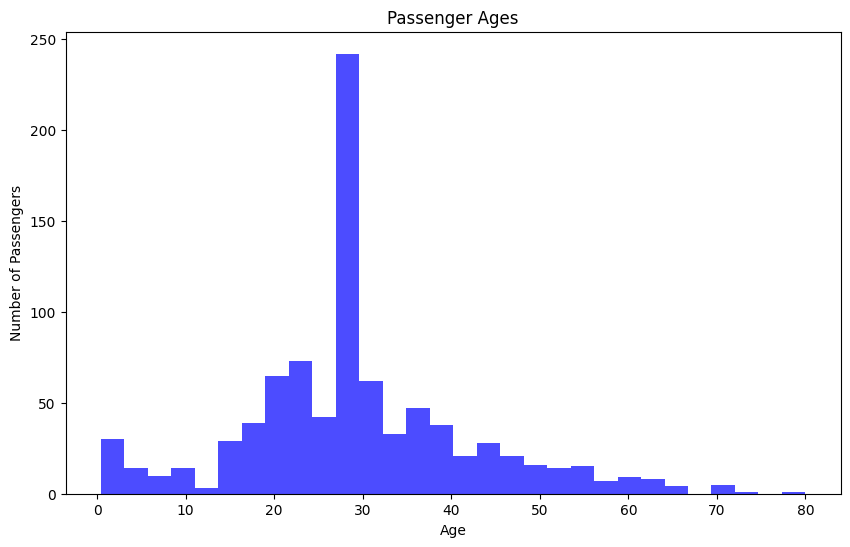

In [546]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
plt.figure(figsize=(10,6))
plt.hist(Titanic['Age'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Text(0, 0.5, 'Average Fare')

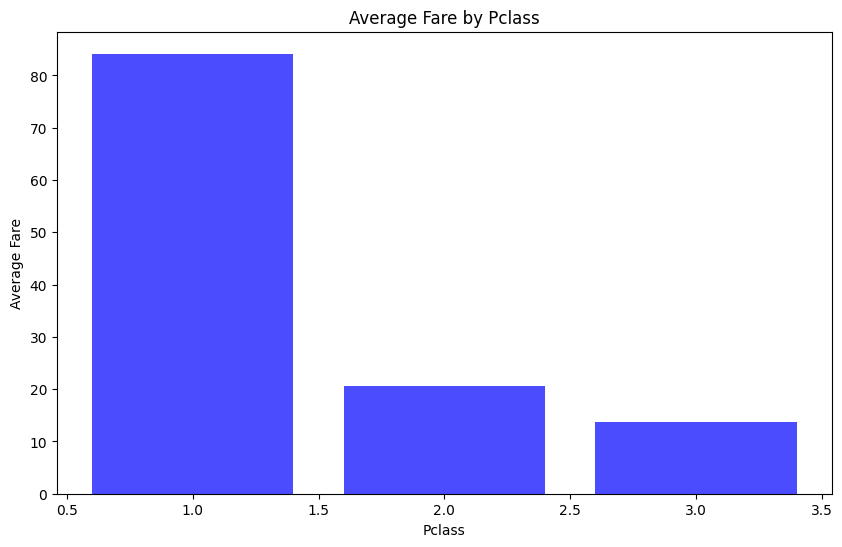

In [551]:
# 43. Plot a bar chart of the average fare by Pclass.
plt.figure(figsize=(10,6))
plt.bar(Titanic.groupby('Pclass')['Fare'].mean().index, Titanic.groupby('Pclass')['Fare'].mean(), color='blue', alpha=0.7)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
